# 1- Initialisation

In [1]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [2]:
# Chargement du Data Set
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=low_memory)

Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.
Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
152795,0818703010598,http://world-fr.openfoodfacts.org/produit/0818...,usda-ndb-import,1489138304,2017-03-10T09:31:44Z,1489138304,2017-03-10T09:31:44Z,Mini Cupcakes,NaN,NaN,NaN,NaN,Antonina's Artisan Bakery,antonina-s-artisan-bakery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Cake: bananas, cane sugar, canola oil, eggs, w...",NaN,NaN,NaN,NaN,NaN,85 g (3 CUPCAKES),NaN,1.0,[ cake -> en:cake ] [ bananas -> en:bananas...,en:e1510,E1510 - Éthanol,0.0,NaN,NaN,0.0,NaN,NaN,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2167.0,NaN,20.0,5.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.071,80.00,58.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,4.71,NaN,NaN,NaN,0.95504,0.376,NaN,0.000106,NaN,NaN,NaN,NaN,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047,NaN,0.00085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
21021,0024000566670,http://world-fr.openfoodfacts.org/produit/0024...,usda-ndb-import,1489063294,2017-03-09T12:41:34Z,1489063294,2017-03-09T12:41:34Z,"Fresh Cut, Blue Lake Cut Green Beans",NaN,NaN,NaN,NaN,"Del Monte Quality, Del Monte Foods","del-

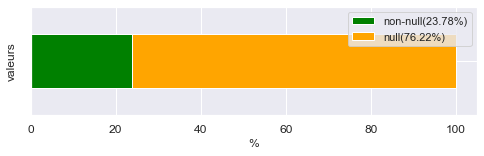

In [3]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

In [4]:
# Suppression de colonnes non pertinentes
df = df.drop(columns=['created_t', 'last_modified_t','created_datetime', 'last_modified_datetime'])

# 2- Filtrage des colonnes avec peu de valeurs

In [5]:
empty_factor = 99.99
nans = nan_cols(df, empty_factor) # Chercher les colonnes vides à plus de 99.99%
print('Voici les colonnes vides à plus de ' + str(empty_factor) + '% :')
nans # Affichage des colonnes trouvées

Voici les colonnes vides à plus de 99.99% :


,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,cities,320749,99.99,23,0.01
1,allergens_fr,320753,99.99,19,0.01
2,no_nutriments,320772,100.00,0,0.00
3,ingredients_from_palm_oil,320772,100.00,0,0.00
4,ingredients_that_may_be_from_palm_oil,320772,100.00,0,0.00
5,nutrition_grade_uk,320772,100.00,0,0.00
6,butyric-acid_100g,320772,100.00,0,0.00
7,caproic-acid_100g,320772,100.00,0,0.00
8,caprylic-acid_100g,320771,100.00,1,0.00
9,capric-acid_100g,320770,100.00,2,0.00


42 colonnes supprimées !
Le data set contient :
	- 320772 lignes et 116 colonnes.
	- 26136509 valeurs manquantes, ce qui représente 70.24 % du data set.


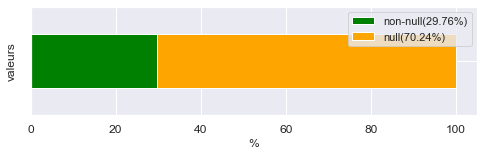

In [6]:
# Suppression des colonnes vides trouvées
df = df.drop(columns=nans['Column'])
print(len(nans), 'colonnes supprimées !')
verifier_taille(df)

# 3- Filtrage des lignes sans code

In [7]:
# Recherche des lignes sans code
nans_code = df[df['code'].isnull()]
print('Le data set contient', len(nans_code), 'lignes sans code.')

Le data set contient 23 lignes sans code.


In [8]:
# Suppression des lignes sans code
df = df[df['code'].notnull()]

# 4- Recherche et traitements des valeurs aberrantes

In [9]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,857.000000,243891.000000,229554.000000,22823.000000,22859.000000,841.000000,186.000000,33.000000,55.000000,188.000000,149.000000,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,38.000000,262.000000,266.000000,414.000000,200886.000000,259906.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11719.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,307.000000,2460.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,259.000000,78.000000,49.000000,3036.000000,165.000000,948.000000,268.000000,221210.000000,221210.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,585.501214,12.730379,5.129932,10.425055,6.312493,3.182103,2.250285,3.617545,0.742291,16.229144,3.823819,0.073476,0.020071,32.073981,16.003484,11.841667,25.897368,6.354084,31.925000,49.790389,2.862111,7.076366,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.014782,0.023378,0.006898,0.205856,8.938696e-05,0.019628,0.058991,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.000427,1.594563,6.425698,31.458587,15.412121,49.547785,341.700764,9.165535,9.058049
std,2.502019,0.140524,0.269207,6.447154e+03,712.809943,17.578747,8.014238,17.076167,10.832591,5.607988,7.971418,14.927170,1.639335,17.512632,6.494183,1.540223,0.358062,29.731719,22.327284,13.993859,30.015451,14.386132,24.704434,33.212338,12.867578,8.409137,128.269454,50.504428,10.959671,0.073278,2.561144,0.000360,0.694039,1.031398,2.236451,2.474306,1.277026,0.270975,1.206822,0.335163,5.132250,5.514738e-03,0.342434,1.462162,0.040660,0.189486,12.528768,0.149725,3.318263,12.058090,0.214408,13.498653,0.080953,0.914247,0.028036,0.067952,0.104503,0.001285,6.475588,2.047841,31.967918,3.753028,18.757932,425.211439,9.055903,9.183589
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,-3.570000,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.700000,-800.000000,0.000000,0.000000,0.000000,-0.000340,0.000000,0.000000,0.000000,0.000000,-0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000008,0.000006,0.000000,0.000002,0.000000,0.000000,-0.000260,0.000000,0.000000,-6.896552,0.000000,0.000000,-0.000002,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,49.400000,0.000000,0.000000,0.000000,0.000000,0.600000,0.068750,0.200000,0.126000,1.850000,0.437000,0.000000,0.000000,6.000000,1.300000,2.100000,0.950000,0.000000,4.50

On peut constater que la quantité de certains composants pour 100g de produit est en dehors de l'intervalle possible [0,100].
<br>
On cerne et affiche ces composants/colonnes dans ce qui suit.

In [10]:
# Identification des colonnes avec des valeurs aberrantes
cols = colsOfType(df, ['int', 'float'])
outlier_cols = [col for col in cols if (df[col].max()>100 or df[col].min()<0) and col not in ['energy_100g', 'energy-from-fat_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']]
print('Colonnes avec des valeurs aberrantes:', ', '.join(outlier_cols))

Colonnes avec des valeurs aberrantes: fat_100g, saturated-fat_100g, monounsaturated-fat_100g, trans-fat_100g, carbohydrates_100g, sugars_100g, fructose_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, vitamin-a_100g, vitamin-c_100g, vitamin-b1_100g, folates_100g, potassium_100g, calcium_100g, phosphorus_100g, iron_100g, magnesium_100g, copper_100g, selenium_100g


In [11]:
# Affichage de la distribution des colonnes aberrantes
# histo_distribution(df[outlier_cols])

La colonne 'ph' contient des valeurs très faibles, ce qui correspond à des acides. On vérifie et traite les produits concernés ci-après.

,product_name,generic_name,ph_100g
218477,Vals,eau minerale naturelle gazeuse,0.0064
272145,abbey well,still scottish spring water,0.0078
275847,Eau minérale naturelle pétillante,eau minérale,0.0050
276432,"Eau Minérale Naturelle, source &quot;Oiselle&q...",Eau minérale naturelle,0.0000


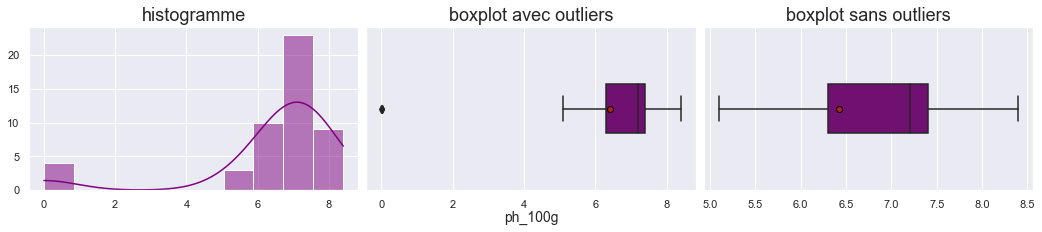

In [12]:
# Affichage des produits avec un ph acide (<5)
ph_data = df[['product_name','generic_name','ph_100g']]
histo_distribution(ph_data)
ph_data[ph_data['ph_100g']<5]

les produits acides trouvés sont tous des eaux minérales, on change leur ph en neutre (7).

In [13]:
df[df['ph_100g']<5] = 7

Pour le reste des colonnes, on efface les valeurs aberrantes (changement en NaN).

In [14]:
df_copy = df.copy()
for col in outlier_cols:
    df[col] = df_copy[col].map(lambda x: np.nan if x<0 or x>100 else x)

In [15]:
# Vérification des changements
df[outlier_cols].describe()

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fructose_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,vitamin-b1_100g,folates_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,copper_100g,selenium_100g
count,243891.000000,229555.000000,22826.000000,143293.000000,243573.000000,244956.000000,41.000000,200885.000000,259906.000000,255355.000000,255432.000000,137557.000000,140867.000000,11157.000000,3043.000000,24749.000000,141043.000000,5844.000000,140465.000000,6250.000000,2109.000000,1171.000000
mean,12.725162,5.125957,10.400503,0.067365,32.054912,15.985302,22.221951,2.832556,7.079835,1.588586,0.647246,0.000600,0.014761,0.313566,0.062414,0.325932,0.102220,0.278940,0.003852,0.150956,0.042304,0.027029
std,17.503567,7.913619,16.687224,0.945716,29.140618,21.165221,26.724750,4.588264,8.156558,6.242531,2.656446,0.082427,0.462916,1.955059,1.470184,1.069029,0.586433,1.161855,0.217632,1.137813,0.950762,0.421536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,1.100000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.004000,0.000042,0.107000,0.000000,0.094000,0.000000,0.021000,0.000178,0.000005
50%,5.000000,1.790000,4.000000,0.000000,20.600000,5.710000,7.000000,1.500000,4.760000,0.580000,0.229000,0.000000,0.000000,0.012000,0.000114,0.180000,0.035000,0.206000,0.001010,0.075000,0.000417,0.000022
75%,20.000000,7.140000,10.710000,0.000000,58.330000,24.000000,35.100000,3.600000,10.000000,1.371600,0.541000,0.000107,0.003700,0.402000,0.000214,0.341000,0.106000,0.357000,0.002400,0.141000,0.001000,0.000062
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,26.700000,100.000000,92.600000,57.142857,66.667000,99.006000,84.900000,50.000000,47.720000,37.600000,7.000000


Les colonnes précédemment problématiques ne semblent plus contenir de valeurs aberrantes.

Après le dernier traitement, on vérifie s'il n'y a pas de nouvelles colonnes vides.

In [16]:
nan_cols(df, 99.99)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN


Il n'y a pas de nouvelles colonnes vides. On passe au processus d'imputation des valeurs manquantes.

# 5- Impuation des valeurs manquantes

Dans la partie suivante, on s'intéresse à l'imputation des valeurs manquantes dans les colonnes numériques.

## 5.1- Restriction du Data Set

Avant d'entamer la suite, on restreint le data set aux colonnes nuériques sur les produits avec un nutri-score défini.

In [17]:
# Restriction du data set aux produits avec un nutri-score
df = df[df['nutrition_grade_fr'].notnull() & df['main_category_fr'].notnull()]



In [18]:
df['nutrition_grade_fr'].unique()

array(['c', 'b', 'e', 'd', 'a', 7], dtype=object)

In [19]:
df[df['nutrition_grade_fr']==7]

,code,url,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
218477,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7.0,7,7,7,7.0,7,7.0,7,7,7,7,7,7,7,7,7,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
272145,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7.0,7,7,7,7.0,7,7.0,7,7,7,7,7,7,7,7,7,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
275847,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7.0,7,7,7,7.0,7,7.0,7,7,7,7,7,7,7,7,7,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
276432,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7.0,7,7,7,7.0,7,7.0,7,7,7,7,7,7,7,7,7,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [20]:
df = df[df['nutrition_grade_fr']!=7]

In [21]:
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].astype('category')
df['nutrition_grade'] = df['nutrition_grade_fr'].cat.codes
df[['nutrition_grade_fr','nutrition_grade']]

,nutrition_grade_fr,nutrition_grade
174,c,2
180,c,2
181,b,1
185,b,1
218,e,4
...,...,...
320693,c,2
320702,b,1
320734,c,2
320751,a,0


In [22]:
', '.join(colsOfType(df, ['int', 'float']))

'additives_n, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n, energy_100g, energy-from-fat_100g, fat_100g, saturated-fat_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, alpha-linolenic-acid_100g, eicosapentaenoic-acid_100g, docosahexaenoic-acid_100g, omega-6-fat_100g, linoleic-acid_100g, trans-fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, sucrose_100g, fructose_100g, lactose_100g, starch_100g, polyols_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, alcohol_100g, vitamin-a_100g, beta-carotene_100g, vitamin-d_100g, vitamin-e_100g, vitamin-k_100g, vitamin-c_100g, vitamin-b1_100g, vitamin-b2_100g, vitamin-pp_100g, vitamin-b6_100g, vitamin-b9_100g, folates_100g, vitamin-b12_100g, biotin_100g, pantothenic-acid_100g, silica_100g, bicarbonate_100g, potassium_100g, chloride_100g, calcium_100g, phosphorus_100g, iron_100g, magnesium_100g, zinc_100g, copper_100g, manganese_100g, fluoride_100g, selenium_100g, iodine_100g, caf

In [23]:
# Sélection des colonnes numériques continues
cols = colsOfType(df, ['int', 'float'])
# Restriction du data set à ces colonnes
df = df[cols]
# Supression des lignes vide
df = df[~df.isnull().all(axis=1)]

df.to_csv('data.csv')

In [24]:
df

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,fructose_100g,lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade
174,0.0,0.0,0.0,1210.0,NaN,12.00,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05600,23.00,0.000,NaN,NaN,NaN,NaN,NaN,2.000,22.000,2.16000,0.850000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,2
180,5.0,0.0,0.0,1090.0,NaN,10.70,2.000,3.33,5.33,NaN,NaN,NaN,NaN,NaN,NaN,0.667,0.00533,38.70,24.700,NaN,NaN,NaN,NaN,NaN,2.000,3.330,0.64700,0.255000,NaN,0.000000,NaN,NaN,NaN,NaN,0.001600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0133,NaN,0.000480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,2
181,0.0,0.0,0.0,1160.0,NaN,1.11,0.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.00000,53.30,1.110,NaN,NaN,NaN,NaN,NaN,2.220,10.000,1.52000,0.600000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0222,NaN,0.006000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1
185,3.0,0.0,0.0,478.0,NaN,6.79,2.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.01070,7.86,0.714,NaN,NaN,NaN,NaN,NaN,0.357,5.360,0.49900,0.196000,NaN,0.000011,NaN,NaN,NaN,NaN,0.000429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0286,NaN,0.000643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1
218,3.0,0.0,0.0,2257.0,NaN,33.30,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.80,51.500,NaN,NaN,NaN,NaN,NaN,NaN,4.700,0.09000,0.035433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,1.0,0.0,0.0,660.0,NaN,6.90,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.10,16.700,NaN,NaN,NaN,NaN,NaN,0.600,0.300,0.54102,0.213000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,2
320702,5.0,0.0,1.0,1031.0,NaN,1.30,1.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.31,0.100,NaN,NaN,NaN,NaN,93.69,1.470,0.004,0.00100,0.000394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1
320734,NaN,NaN,NaN,2155.0,NaN,NaN,3.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800,NaN,NaN,NaN,NaN,NaN,5.600,7.800,1.35000,0.531496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,2
320751,NaN,NaN,NaN,1643.0,NaN,2.80,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.80,2.600,NaN,NaN,NaN,NaN,NaN,5.900,13.000,0.68000,0.267717,NaN,NaN,NaN,

Le data set contient :
	- 57780 lignes et 67 colonnes.
	- 3014496 valeurs manquantes, ce qui représente 77.87 % du data set.


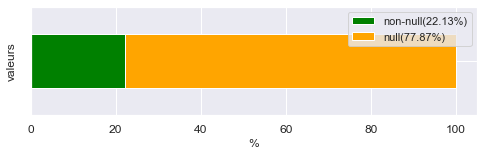

In [25]:
verifier_taille(df)

## 5.2- Echantillonnage du Data Set

Le data set est trop grand pour la suites des traitements, on se restreint à un échantillon aléatoire.

In [26]:
# Définition de la taille de l'échantillon
data_size = len(df)
sample_size = int(data_size*0.1)
print('Taille data set original:', data_size, "Taille de l'échantillon:", sample_size)

sampled_data = df.copy()

# Ré-échantillonner tant qu'il y a au moins une colonne vide
stop = False
while not stop :
    sample = np.random.randint(data_size, size=sample_size)
    sampled_data = df.iloc[sample]
    stop = len(nan_cols(sampled_data, 100)) == 0

# Normalisation des données de l'échantillon pour les futurs imputations
sampled_data, scaler = MinMax_Scaled(sampled_data, frame=True, return_scaler=True)

Taille data set original: 57780 Taille de l'échantillon: 5778


## 5.3- Imputations

### 5.3.1- Imputation Simple (moyenne)

On remplace les valeurs manquantes par la moyenne de la colonne.

In [27]:
aafrom sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean') 
mean_imputer_transfom = mean_imputer.fit_transform(sampled_data)
mean_imputed_data = pd.DataFrame(scaler.inverse_transform(mean_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

mean_imputed_data.to_csv('mean_imputed_data.csv')

### 5.3.2- Imputation Itérative

On remplace les valeurs manquantes par des régressions linaires itératives sur chaque colonne.

In [28]:
# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer(max_iter=100, tol=0.1)
iter_imputer_transfom = iter_imputer.fit_transform(sampled_data)
iter_imputed_data = pd.DataFrame(scaler.inverse_transform(iter_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

iter_imputed_data.to_csv('iter_imputed_data.csv')

C:\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


### 5.3.3- Imputation K-NN

On remplace les valeurs manquantes avec des régressions K-NN: les valeurs manquantes sont calculées à partir des lignes/produits les proches/similaires.

In [29]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
knn_imputer_transfom = knn_imputer.fit_transform(sampled_data)
knn_imputed_data = pd.DataFrame(scaler.inverse_transform(knn_imputer_transfom), columns = sampled_data.columns, index=sampled_data.index)

knn_imputed_data.to_csv('knn_imputed_data.csv')